## Clustering

#### This step consists in clustering the house announcements using K-means++ algorithm. In order to do that we used KMeans Python library. As K-means++ algorithm requires to insert k - number of desired clusters, firstly we choose the optimal number of clusters using the Elbow-Method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
import seaborn as sns
from wordcloud import WordCloud
import pickle

#### importing Information matrix and assigning announcement id as row index.

In [2]:
inf_matrix = pd.read_csv('matrices/matrix_1.csv')
inf_matrix = inf_matrix.set_index('Unnamed: 0')

In [3]:
inf_matrix.head()

,Price,Local,Surface,Bathroom,Floor
Unnamed: 0,,,,,
2,€ 225.000,2,50.0,1,1
3,€ 400.000,3,60.0,1,3
4,€ 500.000,3,89.0,2,3
5,€ 574.000,4,89.0,2,5
6,€ 300.000,2,46.0,1,4


#### filtering information matrix from undesired symbols and dropping rows with incomplete data

In [4]:
escape = r'\n'
price_clean = []
for p in inf_matrix.Price:
    p = p.replace('€ ','')
    p = p.replace(escape,'')
    p = p.replace('.','')
    price_clean.append(p)
    
# locals clean 
local_clean = []
for l in inf_matrix.Local:
    l = l.replace('+','')
    local_clean.append(int(l))
    
# surfaces clean
surface_clean = []
for s in inf_matrix.Surface:
    s = str(s)
    s = s.replace('.','')
    surface_clean.append(int(s))

# bathrooms clean
bath_clean = []
for b in inf_matrix.Bathroom:
    b = b.replace('+','')
    bath_clean.append(int(b))
    
inf_matrix = pd.DataFrame({'Price': price_clean,
                       'Local': local_clean,
                       'Surface': surface_clean,
                       'Bathroom': bath_clean,
                       'Floor': inf_matrix.Floor})

inf_matrix = inf_matrix[inf_matrix.Price.apply(lambda x: x.isdigit())]
inf_matrix = inf_matrix[inf_matrix.Local.apply(lambda x: (str(x)).isdigit())]
inf_matrix = inf_matrix[inf_matrix.Surface.apply(lambda x: str(x).isdigit())]
inf_matrix = inf_matrix[inf_matrix.Bathroom.apply(lambda x: (str(x)).isdigit())]
inf_matrix = inf_matrix[inf_matrix.Floor.apply(lambda x: (str(x)).isdigit())]

In [6]:
column_names = list(inf_matrix.columns)

#### choosing the optimal number of clusters using Elbow Method.  As we can see on a graph below, there are two possible values for number of clusters: 3 and 4, but as SSD (Sum of squared distances) varies stronger between 2 and 3 and not 3 and 4, we choose 3 as the most reasonable number of clusters for informational matrix.

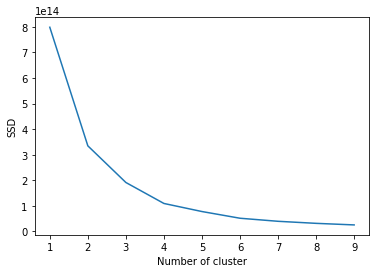

In [8]:
distance = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000).fit(inf_matrix)
    inf_matrix["clusters"] = kmeans.labels_ # Index of the cluster each sample belongs to.
    distance[k] = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
plt.figure()
plt.plot(list(distance.keys()), list(distance.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSD") # Sum of squared distances 
plt.show()

In [10]:
inf_matrix = inf_matrix.drop(['clusters'], axis=1)

#### Below we perform clustering using k-means++ method, inserting our chosen number of clusters = 3. cl_ind is a list of clusters' indexes. cluster_centers_inf is a data frame for saving clusters centers.

In [11]:
# create kmeans object
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
# fit kmeans object to data
kmeans.fit(inf_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# prediction of cluster index for each sample
cl_ind = kmeans.fit_predict(inf_matrix)

[[  1.37898551e+00   2.58188406e+00   2.97657005e+00   2.62918476e+05
    8.79024155e+02]
 [  2.12462462e+00   2.83258258e+00   4.31231231e+00   6.91317192e+05
    1.52015766e+03]
 [  2.66159696e+00   2.93536122e+00   4.76806084e+00   1.66376046e+06
    2.41057034e+03]]


In [12]:
inf_matrix['cl_ind'] = cl_ind # index of cluster to whuch sample belongs

In [13]:
cluster_centers_inf = pd.DataFrame(data = kmeans.cluster_centers_,columns = column_names)

In [14]:
cluster_centers_inf['cl_ind'] = np.unique(cl_ind)

In [15]:
cluster_centers_inf

,Bathroom,Floor,Local,Price,Surface,cl_ind
0,1.389112,2.589586,2.995503,2.673767e+05,886.139645,0
1,2.695279,2.969957,4.793991,1.724142e+06,2482.446352,1
2,2.147220,2.819890,4.344558,7.169103e+05,1547.094753,2


In [16]:
inf_matrix.head()

,Bathroom,Floor,Local,Price,Surface,cl_ind
Unnamed: 0,,,,,,
2,1,1,2,225000,500,0
3,1,3,3,400000,600,0
4,2,3,3,500000,890,2
5,2,5,4,574000,890,2
6,1,4,2,300000,460,0


#### Below we provide visual representation of our clusters, as we have 5 features which describe our data sample, we decided to show them separately.

#### First graph is for showing our 3 clusters according to price in the announcment, while others are for all other columns respectively. Another colour represents centeres of clusters.

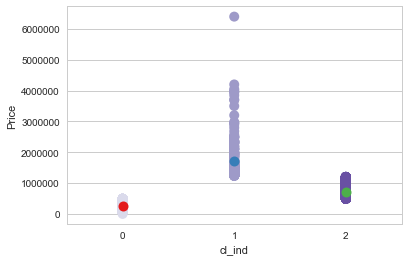

In [17]:
sns.set(style="whitegrid")
ax = sns.stripplot(x="cl_ind", y="Price", data=inf_matrix, palette="Purples", size=10)
ax = sns.stripplot(x="cl_ind", y="Price", data=cluster_centers_inf, palette="Set1", size=10)
plt.show()

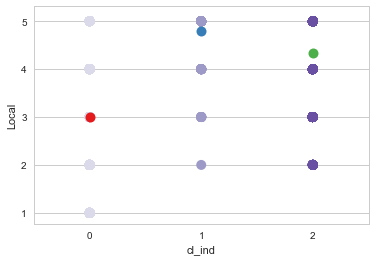

In [18]:
ax = sns.stripplot(x="cl_ind", y="Local", data=inf_matrix, palette="Purples", size=10)
ax = sns.stripplot(x="cl_ind", y="Local", data=cluster_centers_inf, palette="Set1", size=10)
plt.show()

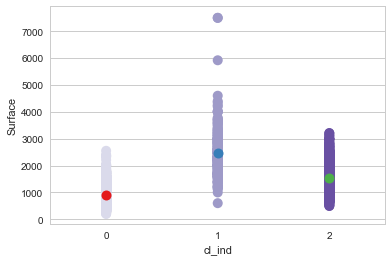

In [19]:
ax = sns.stripplot(x="cl_ind", y="Surface", data=inf_matrix, palette="Purples", size=10)
ax = sns.stripplot(x="cl_ind", y="Surface", data=cluster_centers_inf, palette="Set1", size=10)
plt.show()

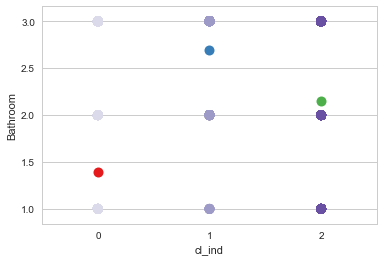

In [20]:
ax = sns.stripplot(x="cl_ind", y="Bathroom", data=inf_matrix, palette="Purples", size=10)
ax = sns.stripplot(x="cl_ind", y="Bathroom", data=cluster_centers_inf, palette="Set1", size=10)
plt.show()

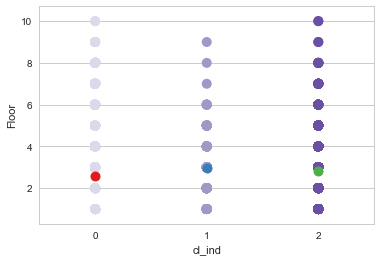

In [21]:
ax = sns.stripplot(x="cl_ind", y="Floor", data=inf_matrix, palette="Purples", size=10)
ax = sns.stripplot(x="cl_ind", y="Floor", data=cluster_centers_inf, palette="Set1", size=10)
plt.show()

#### Here we are clustering using k-means++ Description matrix. Same as in the previous part, firstly we choose optimal number of clusters and then perform clustering

In [22]:
desc_matrix = pd.read_csv('matrices/matrix_2.csv')
desc_matrix = desc_matrix.set_index('Unnamed: 0')

In [23]:
desc_matrix.head()

,a,aabbiamo,ab,abacu,abamelek,abano,abb,abba,abbaini,abbaino,...,élégant,énergétiqu,équipé,étage,état,étude,été,ìntegrata,último,über
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Here on graph we can see that the only optimal value for number of clusters is two, as SSD is significantly differs between 1 and 2, when it comes to 3 or more clusters, SSD is practically the same, it is shown on the graph below and also in distance dictionary. That's why for description matrix we choose k - number of clusters = 2.

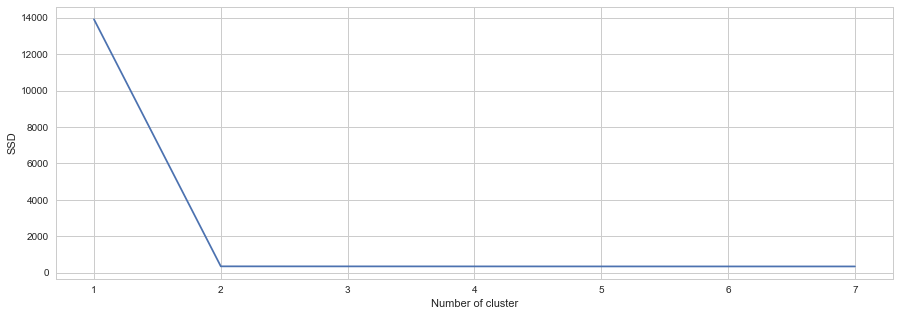

In [69]:
distance = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(desc_matrix) 
    desc_matrix["clusters"] = kmeans.labels_ # Index of the cluster each sample belongs to. 
    distance[k] = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
plt.figure(figsize=(15,5))
plt.plot(list(distance.keys()), list(distance.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSD") # Sum of squared distances 
plt.show()

In [70]:
distance

{1: 13912.261614815779,
 2: 345.65877565843874,
 3: 344.02504188926343,
 4: 342.63508317391899,
 5: 341.39649087516318,
 6: 340.69500906314789,
 7: 340.1535108612124}

#### graph for k equals from 2 to 7

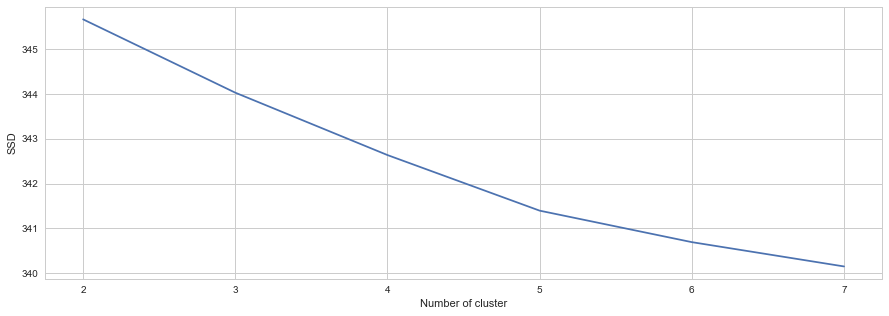

In [71]:
plt.figure(figsize=(15,5))
plt.plot(list(distance.keys())[1:], list(distance.values())[1:])
plt.xlabel("Number of cluster")
plt.ylabel("SSD") # Sum of squared distances 
plt.show()

#### performing k-means++ algorithm for description matrix. We are not going to plot clusters for this matrix as it has too many features

In [72]:
# create kmeans object
kmeans = KMeans(n_clusters=2, init='k-means++')
# fit kmeans object to data
kmeans.fit(desc_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# prediction of cluster index for each sample
cl_ind = kmeans.fit_predict(desc_matrix)

[[  1.50325894e-03   1.53676877e-05  -6.57297567e-19 ...,   4.33447601e-06
    1.21695868e+00   2.62984079e-15]
 [  2.09858830e-03  -1.76182853e-19   2.01781847e-05 ...,   2.20228566e-20
    4.16628109e+00   1.15673800e-01]]


In [74]:
desc_matrix['cl_ind'] = cl_ind # index of cluster to whuch sample belongs

cluster_centers_inf = pd.DataFrame(data = kmeans.cluster_centers_)

cluster_centers_inf['cl_ind'] = np.unique(cl_ind)

cluster_centers_inf

,0,1,2,3,4,5,6,7,8,9,...,15564,15565,15566,15567,15568,15569,15570,15571,15572,cl_ind
0,0.002099,-1.761829e-19,2.017818e-05,-1.368805e-18,1.822546e-05,1.738428e-05,-5.082198e-21,2.473336e-19,0.000013,0.000019,...,0.000113,-2.219226e-19,2.092552e-05,-1.215492e-19,1.228237e-05,4.065758e-20,2.202286e-20,4.166281,1.156738e-01,0
1,0.001503,1.536769e-05,-6.572976e-19,6.475728e-05,3.828589e-19,1.270549e-20,4.857602e-06,3.674882e-05,0.000008,0.000014,...,0.000029,1.052862e-05,2.015938e-19,4.843684e-06,-2.905323e-19,2.744230e-06,4.334476e-06,1.216959,2.629841e-15,1


## Comparison among cluster

#### Find similar clusters. To check this we use the Jaccard-Similarity to measure the similarity betweeen the two outputs (information clusters vs description clusters) and then we return the 3-most similar couples of clusters.

#### To find similarity between clusters we need to compare each pair of clusters. For example, first cluster from information data with first and second from description data. 
#### To do that we use formula: intersection(clusters) / union(clusters). To find this we need announcement's id-s which belong to each cluster.

####  now for each of matrices we are saving announcement’s id-s for each cluster

In [75]:
m1_indexes = []
for i in range(len(np.unique(inf_matrix.cl_ind))):
    m1_indexes.append(list(inf_matrix[inf_matrix.cl_ind == i].index.values))

In [76]:
print(m1_indexes[1]) #announcements in second cluster of informational data

[25, 35, 37, 43, 52, 58, 63, 66, 72, 76, 77, 85, 91, 105, 107, 108, 130, 131, 145, 154, 162, 175, 178, 181, 204, 206, 207, 227, 249, 291, 293, 296, 298, 301, 306, 313, 319, 330, 331, 332, 335, 337, 339, 368, 378, 381, 393, 438, 495, 496, 546, 547, 555, 653, 686, 696, 702, 907, 911, 925, 1077, 1079, 1104, 1138, 1180, 1189, 1206, 1247, 1281, 1317, 1678, 1735, 1761, 1763, 1840, 1851, 1889, 1948, 2067, 2076, 2104, 2117, 2150, 2232, 2254, 2274, 2284, 2491, 2531, 2569, 2584, 2647, 2700, 2704, 2706, 2717, 2718, 2741, 2767, 2995, 3003, 3004, 3007, 3008, 3021, 3121, 3157, 3185, 3239, 3279, 3327, 3368, 3370, 3377, 3432, 3436, 3474, 3534, 3567, 3578, 3589, 3610, 3625, 3683, 3806, 3902, 3986, 3995, 4037, 4053, 4065, 4136, 4164, 4214, 4341, 4355, 4372, 4406, 4412, 4444, 4575, 4638, 4653, 4753, 4926, 5049, 5061, 5154, 5237, 5397, 5498, 5529, 5531, 5542, 5628, 5634, 5670, 5804, 6091, 6136, 6138, 6163, 6262, 6284, 6286, 6296, 6391, 6411, 6428, 6525, 6543, 6604, 6615, 6655, 6658, 6732, 6733, 6778, 6804

In [78]:
m2_indexes = []
for i in range(len(np.unique(desc_matrix.cl_ind))):
    m2_indexes.append(list(desc_matrix[desc_matrix.cl_ind == i].index.values))

#### Jaccard Similarity
#### Jaccard_Similarity is a data frame of similaruty measures between information clusters and description clusters. Where columns are for informatiom clucters.

In [79]:
Jaccard_Similarity = pd.DataFrame(np.zeros((len(np.unique(desc_matrix.cl_ind)),len(np.unique(inf_matrix.cl_ind)))))
Jaccard_Similarity_dict = {}

In [80]:
Jaccard_Similarity

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.0


In [81]:
for i in range(len(m1_indexes)):
    for j in range(len(m2_indexes)):
        val = len(set(m1_indexes[i]).intersection(set(m2_indexes[j]))) / len(set(m1_indexes[i]).union(set(m2_indexes[j])))
        Jaccard_Similarity[i][j] = val
        Jaccard_Similarity_dict[val] = (i,j)

In [82]:
Jaccard_Similarity

,0,1,2
0,0.360786,0.015406,0.104760
1,0.328529,0.037829,0.163249


#### Now when we have our similarity values we are looking for 3 most similar pairs of clusters

In [83]:
Jaccard_Similarity_dict

{0.015405777166437413: (1, 0),
 0.03782859585381492: (1, 1),
 0.10475968268782081: (2, 0),
 0.1632492113564669: (2, 1),
 0.32852852852852854: (0, 1),
 0.3607863974495218: (0, 0)}

In [84]:
Jaccard_Similarity_lst = list(Jaccard_Similarity_dict.keys())

In [85]:
Jaccard_Similarity_lst.sort(reverse=True)

In [86]:
Jaccard_Similarity_lst

[0.3607863974495218,
 0.32852852852852854,
 0.1632492113564669,
 0.10475968268782081,
 0.03782859585381492,
 0.015405777166437413]

#### Here we see our pairs of most similar clusters in format (information cluster id,description cluster id)

In [87]:
print(Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[0]), Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[1]), \
Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[2]))

(0, 0) (0, 1) (2, 1)


### Word cloud of house descriptions

#### To create a word cloud for a pair of clusters we need union of announcements id-s in these clusters, and then using these id-s we get announcements' descriptions.

In [88]:
# list of id-s for each cluster
cloud_doc_ids = []

for i in range(3):
    Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[i])[0]
    cloud_doc_ids.append(list(set(m1_indexes[Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[i])[0]]).\
                              union(set(m2_indexes[Jaccard_Similarity_dict.get(Jaccard_Similarity_lst[i])[1]]))))

In [89]:
word_clouds = [] # list of words for each cluster 
for i in range(len(cloud_doc_ids)):
    cloud = ''
    for elem in cloud_doc_ids[i]:
        with open('desc_files/desc_' + str(elem) + '.txt', 'r') as f:
            data = f.readlines()
 
            for line in data:
                words = line.split()
                cloud_string = ' '.join(words)
        cloud = cloud + ' ' + cloud_string
    word_clouds.append(cloud)

#### Word cloud for first pair of clusters

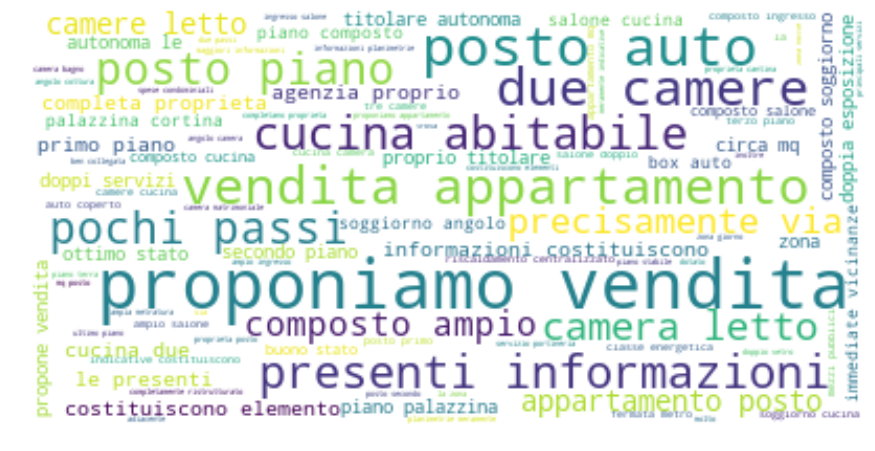

In [90]:
# Start with one review:
text = word_clouds[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud for second pair of clusters

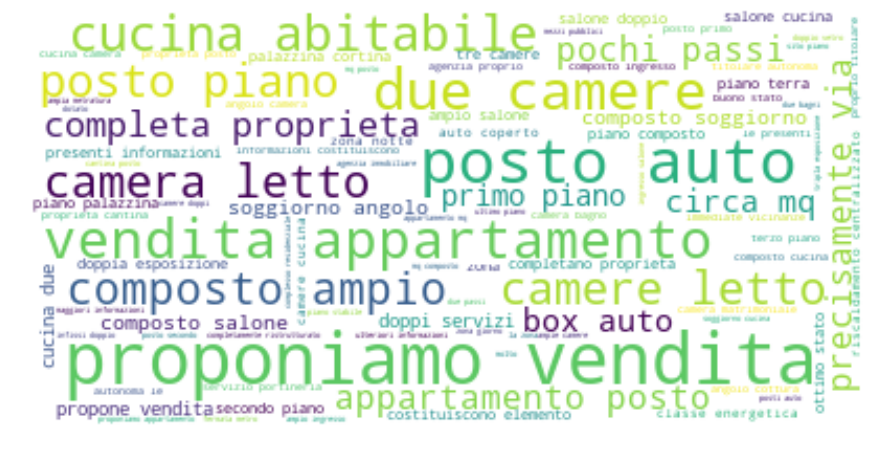

In [91]:
# Start with one review:
text = word_clouds[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud for the third pair of clusters

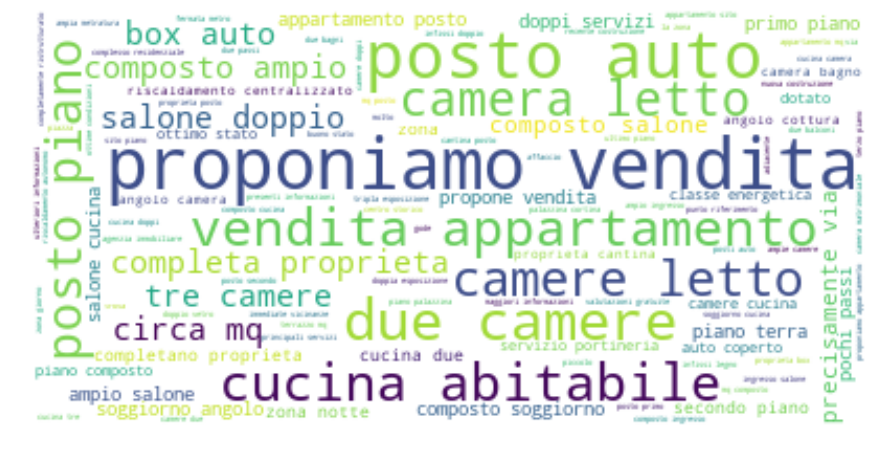

In [92]:
# Start with one review:
text = word_clouds[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()